In [63]:
from google.colab import files
uploaded = files.upload()

Saving diwali_data.csv to diwali_data (1).csv


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df=pd.read_csv('diwali_data.csv')

In [66]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [67]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [68]:
#TOTAL CUSTOMERS VISITED
total_customers=df['User_ID'].nunique()
print(f'Total number of customers visited: {total_customers}')

Total number of customers visited: 3755


In [69]:
#TOTAL MALE AND FEMALE CUSTOMERS VISITED
gender_counts=df['Gender'].value_counts()
print(gender_counts)

Gender
F    7842
M    3409
Name: count, dtype: int64


<ipython-input-70-ad4c261ea65c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=df,palette=['red', 'green'])


Text(0, 0.5, 'Count')

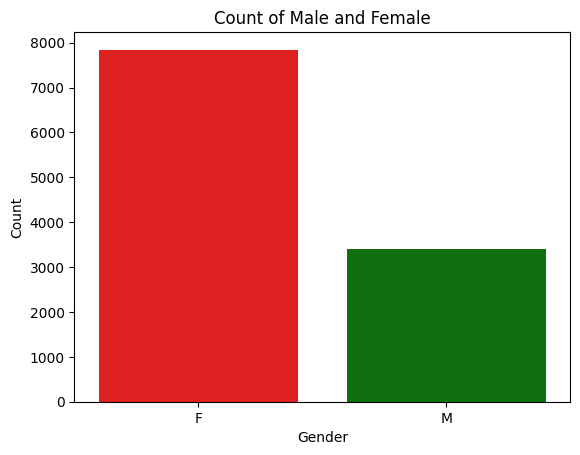

In [70]:
sns.countplot(x='Gender',data=df,palette=['red', 'green'])
plt.title('Count of Male and Female')
plt.xlabel('Gender')
plt.ylabel('Count')

In [71]:
#RENAMING 0 TO UNMARRIED AND 1 TO MARRIED
df['Marital_Status'].replace({0:'Unmarried',1:'Married'},inplace=True)

<ipython-input-71-e5e729ab32b5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marital_Status'].replace({0:'Unmarried',1:'Married'},inplace=True)


In [72]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [73]:
#COUNT OF MARRIED AND UNMARRIED COUPLE VISITED
print("Married and Unmarried customers visited :")
df['Marital_Status'].value_counts()

Married and Unmarried customers visited :


,count
Marital_Status,
Unmarried,6522
Married,4729


<ipython-input-74-30eb8cc79182>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital_Status',data=df,palette=['yellow', 'green'])


Text(0, 0.5, 'Count')

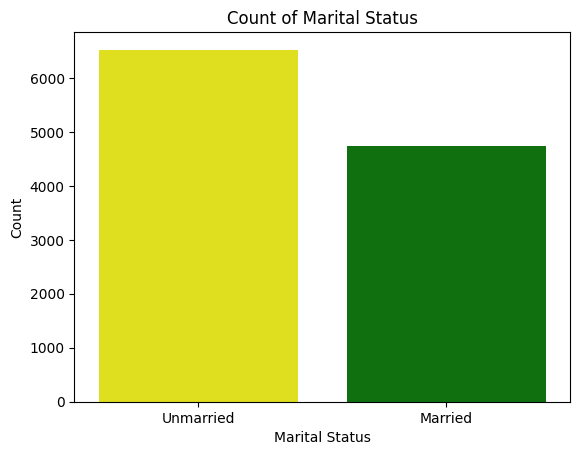

In [74]:
sns.countplot(x='Marital_Status',data=df,palette=['yellow', 'green'])
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

In [75]:
#TOTAL ORDERS
print("Total orders",df['Orders'].sum())

Total orders 28007


In [76]:
#TOTAL REVENUE GENERATED
print("Total revenue generated",df['Amount'].sum())

Total revenue generated 106249132.43


In [77]:
#STATE WISE AMOUNT GENERATED
total_amt=df.groupby('State')['Amount'].sum().reset_index()
total_amt.columns=['State','Total Amount']
print('Toal revenue generated state wise')
print(total_amt)

Toal revenue generated state wise
               State  Total Amount
0     Andhra Pradesh    8037146.99
1              Bihar    4022757.00
2              Delhi   11603819.45
3            Gujarat    3946082.00
4            Haryana    4220175.00
5   Himachal Pradesh    4963368.00
6          Jharkhand    3026456.00
7          Karnataka   13523540.00
8             Kerala    3894491.99
9     Madhya Pradesh    8101142.00
10       Maharashtra   14427543.00
11            Punjab    1525800.00
12         Rajasthan    1909409.00
13         Telangana    1151490.00
14     Uttar Pradesh   19374968.00
15       Uttarakhand    2520944.00


In [78]:
#TOP 5 STATES GENERATING AMOUNT
top5_states=total_amt.nlargest(5,'Total Amount')
print('Top 5 states are : ')
print(top5_states)

Top 5 states are : 
             State  Total Amount
14   Uttar Pradesh   19374968.00
10     Maharashtra   14427543.00
7        Karnataka   13523540.00
2            Delhi   11603819.45
9   Madhya Pradesh    8101142.00


<ipython-input-79-3695af02e75b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State',y='Total Amount',data=top5_states,palette=['red','green','blue','black','orange'])


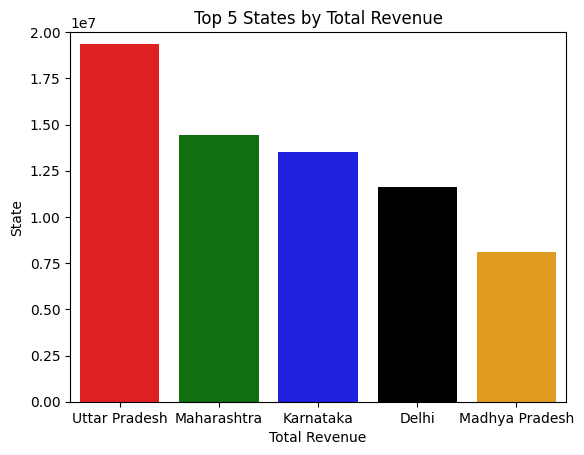

In [79]:
sns.barplot(x='State',y='Total Amount',data=top5_states,palette=['red','green','blue','black','orange'])
plt.title('Top 5 States by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('State')
plt.ylim(0, 20000000)
plt.show()

In [80]:
#ZONE WISE ORDERS PLACED
total_ord=df.groupby('Zone')['Orders'].sum().reset_index()
total_ord.columns=['Zone','Total Orders']
zone_summary_sorted = total_ord.sort_values(by='Total Orders', ascending=False)
print('Toal orders zone wise')
print(zone_summary_sorted)

Toal orders zone wise
       Zone  Total Orders
0   Central         10640
3  Southern          6744
4   Western          4881
2  Northern          3727
1   Eastern          2015


<ipython-input-81-e2fedfa978be>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Zone',y='Total Orders',data=zone_summary_sorted,palette=['Orange','magenta','yellow','red','cyan'])


Text(0.5, 1.0, 'Zone wise orders placed')

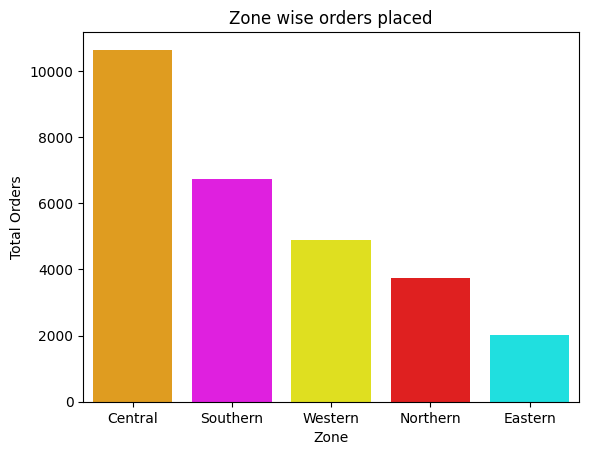

In [81]:
sns.barplot(x='Zone',y='Total Orders',data=zone_summary_sorted,palette=['Orange','magenta','yellow','red','cyan'])
plt.title('Zone wise orders placed')

In [82]:
#MARITAL STATUS INFO ZONE WISE
cross=pd.crosstab(index=[df['Marital_Status']], columns=df['Zone'], margins=True)
print(cross)

Zone            Central  Eastern  Northern  Southern  Western    All
Marital_Status                                                      
Married            1815      348       622      1153      791   4729
Unmarried          2481      466       869      1542     1164   6522
All                4296      814      1491      2695     1955  11251


In [83]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [84]:
#AGE-GROUP WISE ORDERS PLACED
cross1=pd.crosstab(index=[df['Age Group']],columns=df['Orders'])
print(cross1)

Orders        1     2     3     4
Age Group                        
0-17         91    73    75    57
18-25       471   496   461   451
26-35      1109  1148  1151  1135
36-45       560   609   549   568
46-50       284   250   217   236
51-55       188   223   202   219
55-70       110    96   113   109


In [86]:
#ZONE WISE AMOUNT GENERATED
total_amt1=df.groupby('Zone')['Amount'].sum().reset_index()
total_amt1.columns=['Zone','Total Amount']
sorted=total_amt1.sort_values(by='Total Amount',ascending=False)
print('Toal revenue generated zone wise')
print(sorted)

Toal revenue generated zone wise
       Zone  Total Amount
0   Central   41600873.45
3  Southern   26606668.98
4   Western   18373625.00
2  Northern   12618752.00
1   Eastern    7049213.00


<ipython-input-90-46514a29de20>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Amount',y='Zone',data=sorted, palette=['red','yellow','darkblue','indigo','green'])


<Axes: xlabel='Total Amount', ylabel='Zone'>

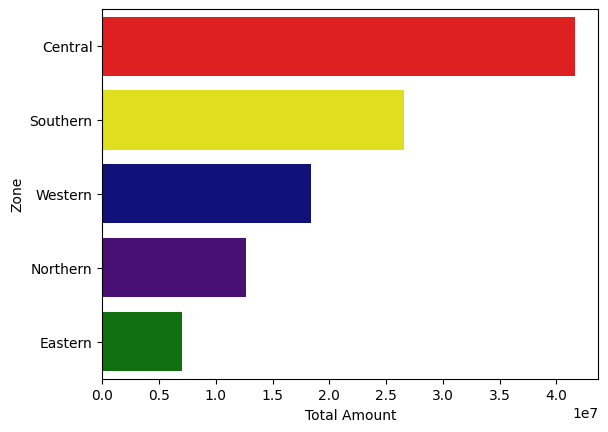

In [90]:
sns.barplot(x='Total Amount',y='Zone',data=sorted, palette=['red','yellow','darkblue','indigo','green'])

In [102]:
cross2=pd.crosstab(index=[df['Orders']],columns=df['Marital_Status'])
print(cross2)

Marital_Status  Married  Unmarried
Orders                            
1                  1181       1632
2                  1222       1673
3                  1180       1588
4                  1146       1629


In [110]:
#PRODUCT_CATEGORY WISE AMOUNT GENERATED
total_amt2=df.groupby('Product_Category')['Amount'].sum().reset_index()
total_amt2.columns=['Product_Category','Total Amount']
sorted1=total_amt2.sort_values(by='Total Amount',ascending=False)
x=sorted1.nlargest(5,'Total Amount')
print('Toal revenue generated Product_Category')
print(x)

Toal revenue generated Product_Category
        Product_Category  Total Amount
6                   Food   33933883.50
3     Clothing & Apparel   16495019.00
5  Electronics & Gadgets   15643846.00
7       Footwear & Shoes   15575209.45
8              Furniture    5440051.99


<ipython-input-111-ce13fc07d9d7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Total Amount',x='Product_Category',data=x, palette=['red','yellow','darkblue','indigo','green'])


<Axes: xlabel='Product_Category', ylabel='Total Amount'>

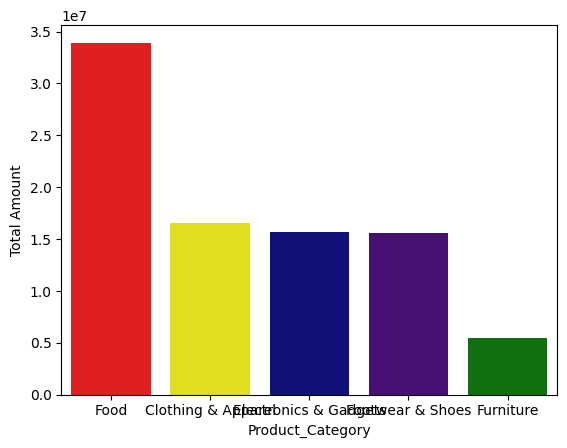

In [111]:
sns.barplot(y='Total Amount',x='Product_Category',data=x, palette=['red','yellow','darkblue','indigo','green'])